<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74 entries, 2012-11-17 to 2019-04-03
Data columns (total 1 columns):
release    74 non-null int64
dtypes: int64(1)
memory usage: 1.2 KB


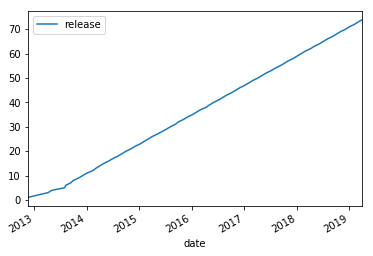

In [130]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("clinvar.csv",
                 index_col=0,
                 parse_dates=[0],)
                 #date_parser=lambda d: datetime.strptime(d,"%d/%m/%Y"))
df.info()
df.plot()
#df.tail(20)

In [125]:
df = df["2015-01-01":]
df = df.asfreq("1d",method="bfill")
df.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 2015-01-31 to 2019-03-31
Freq: M
Data columns (total 1 columns):
release    51 non-null int64
dtypes: int64(1)
memory usage: 816.0 bytes


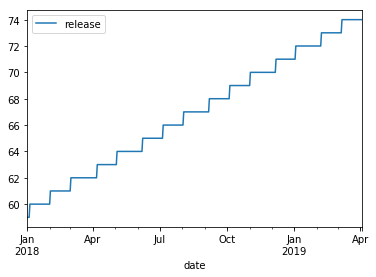

In [220]:
%matplotlib inline
df["2018-01-01":"2019-12-31"].plot()

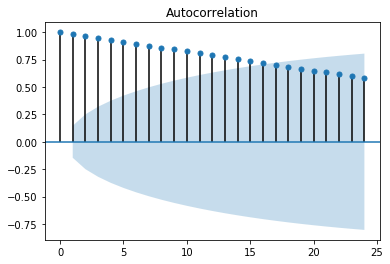

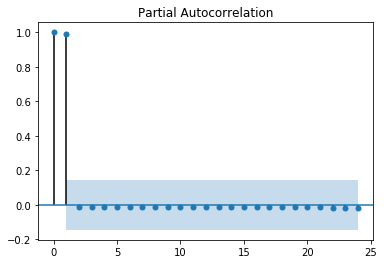

In [221]:
from statsmodels.tsa.stattools import adfuller
adfuller(df[-180:].release)
_ = plot_acf(df[-180:],lags=24)
_ = plot_pacf(df[-180:],lags=24)

(-13.692091614543974, 1.3379974919056364e-25, 0, 179, {'1%': -3.4674201432469816, '10%': -2.575452082332012, '5%': -2.877826051844538}, -109.91256690633304)


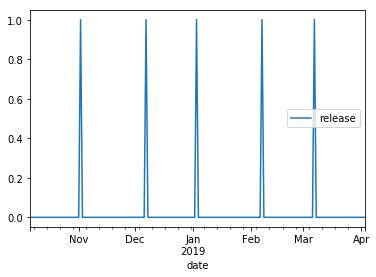

In [222]:
ddf = df.diff(periods=1)
#print(adfuller(df[-180:].release))
print(adfuller(ddf[-180:].release))
ddf[-180:].plot()

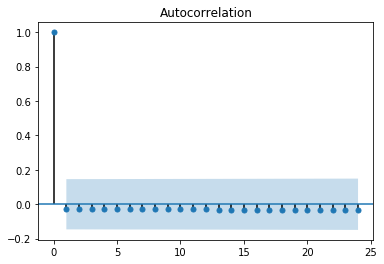

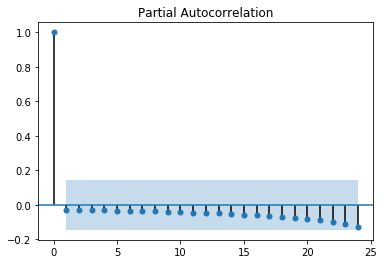

In [223]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
_ = plot_acf(ddf[-180:],lags=24)
_ = plot_pacf(ddf[-180:],lags=24)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   99
Model:                 ARIMA(2, 1, 1)   Log Likelihood                  24.024
Method:                       css-mle   S.D. of innovations              0.187
Date:                Tue, 16 Apr 2019   AIC                            -38.048
Time:                        15:39:09   BIC                            -25.072
Sample:                             1   HQIC                           -32.798
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0334      0.003     11.080      0.000       0.028       0.039
ar.L1.D.y      0.8627      0.100      8.626      0.000       0.667       1.059
ar.L2.D.y     -0.0624      0.103     -0.607      0.5

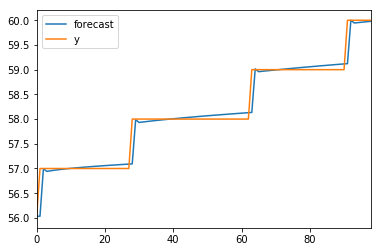

In [224]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
X = df.values
X.size
train = X[1000:1100]
test = X[:1000]
pred = []
mar = ARIMA(train,order=(2,1,1))
fmar = mar.fit()
print(fmar.summary())
_ = fmar.plot_predict()
#fmar.resid


(-8.97397899301507, 7.619555608308096e-15, 13, 166, {'1%': -3.4703698981001665, '10%': -2.576139407751488, '5%': -2.8791138497902193}, -80.01445887934347)
                                 Statespace Model Results                                 
Dep. Variable:                            release   No. Observations:                  180
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 14)   Log Likelihood                -158.531
Date:                            Tue, 16 Apr 2019   AIC                            319.062
Time:                                    15:39:58   BIC                            322.168
Sample:                                10-06-2018   HQIC                           320.323
                                     - 04-03-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

AttributeError: 'SARIMAXResults' object has no attribute 'plot_predict'

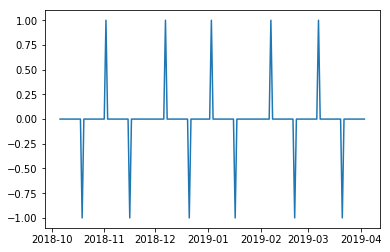

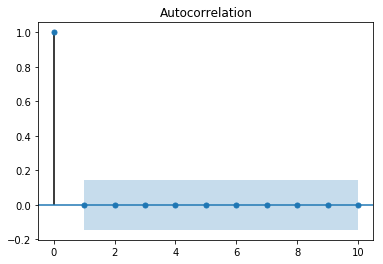

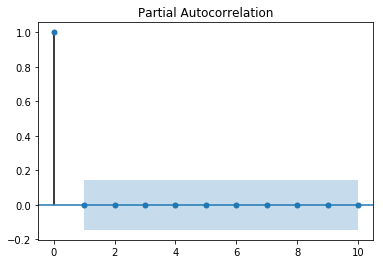

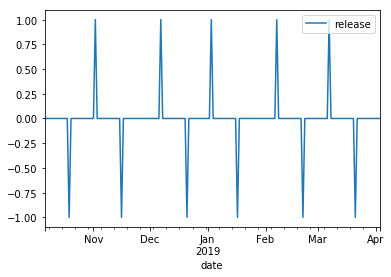

In [227]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
ddf = df.diff().diff(14)
plt.plot(ddf[-180:])
print(adfuller(ddf[-180:].release))
_ = plot_acf(ddf[-180:],lags=10)
_ = plot_pacf(ddf[-180:],lags=10)
ddf[-180:].plot()
sar = SARIMAX(ddf[-180:],order=(0,1,0),seasonal_order=(0,1,0,14))
fsar = sar.fit()
print(fsar.summary())
_ = fsar.plot_predict()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2329 entries, 2012-11-17 to 2019-04-03
Freq: D
Data columns (total 1 columns):
0    2329 non-null int64
dtypes: int64(1)
memory usage: 36.4 KB
(-3.861559790845832, 0.002336682627617137, 14, 165, {'1%': -3.470616369591229, '10%': -2.57619681359045, '5%': -2.8792214018977655}, 437.44248824002227)
                                 Statespace Model Results                                 
Dep. Variable:                                  0   No. Observations:                  180
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 15)   Log Likelihood                -446.533
Date:                            Tue, 16 Apr 2019   AIC                            895.066
Time:                                    15:43:10   BIC                            898.166
Sample:                                10-06-2018   HQIC                           896.324
                                     - 04-03-2019                                         
Covariance Typ

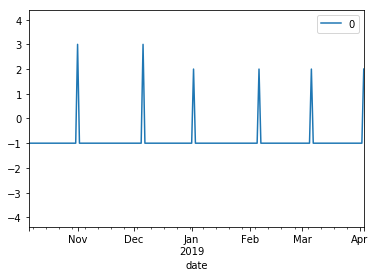

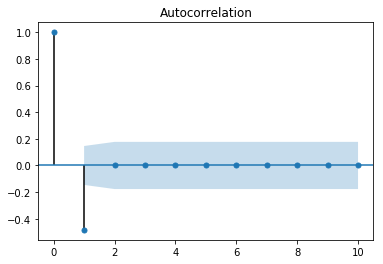

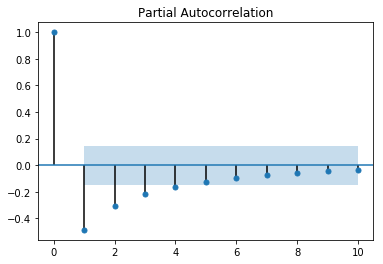

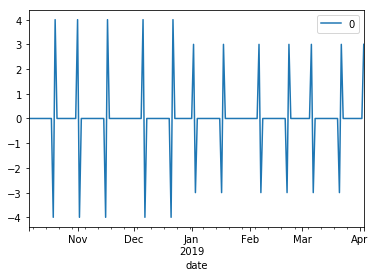

In [241]:
dowidx = []
df = pd.read_csv("clinvar.csv",
                 index_col=0,
                 parse_dates=[0],)
                 #date_parser=lambda d: datetime.strptime(d,"%d/%m/%Y"))
for d in df.index:
    dowidx.append(d.weekday())
dowdf = pd.DataFrame(dowidx,df.index)
dowdf = dowdf.asfreq("1d",fill_value=-1)
dowdf.info()
dowdf[-180:].plot()
#
ddowdf = dowdf.diff().diff(15)
plt.plot(ddowdf[-180:])
print(adfuller(ddowdf[-180:][0]))
_ = plot_acf(ddowdf[-180:],lags=10)
_ = plot_pacf(ddowdf[-180:],lags=10)
ddowdf[-180:].plot()
sar = SARIMAX(ddowdf[-180:],order=(0,1,0),seasonal_order=(0,1,0,15),enforce_invertibility=False)
fsar = sar.fit()
print(fsar.summary())

In [126]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df["2019-01-01":].release)
_ = decomp.plot()
decomp.plot?

ValueError: operands could not be broadcast together with shapes (3,) (23,) 

In [131]:
from fbprophet import Prophet
model = Prophet(interval_width=.95)
df["ds"] = df.index
df["y"] = df["release"]
model.fit(df["2018-06-01":])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.0.


In [133]:
future_dates = model.make_future_dataframe(periods=30)
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-10:]

,ds,yhat,yhat_lower,yhat_upper
31,2019-04-24,74.649637,74.530604,74.759839
32,2019-04-25,74.682869,74.561792,74.788537
33,2019-04-26,74.716101,74.592463,74.818944
34,2019-04-27,74.749333,74.623422,74.867867
35,2019-04-28,74.782565,74.648524,74.904106
36,2019-04-29,74.815798,74.676834,74.944013
37,2019-04-30,74.849030,74.720612,74.971889
38,2019-05-01,74.882262,74.742728,75.007752
39,2019-05-02,74.915494,74.753950,75.059102
40,2019-05-03,74.948726,74.783328,75.091044


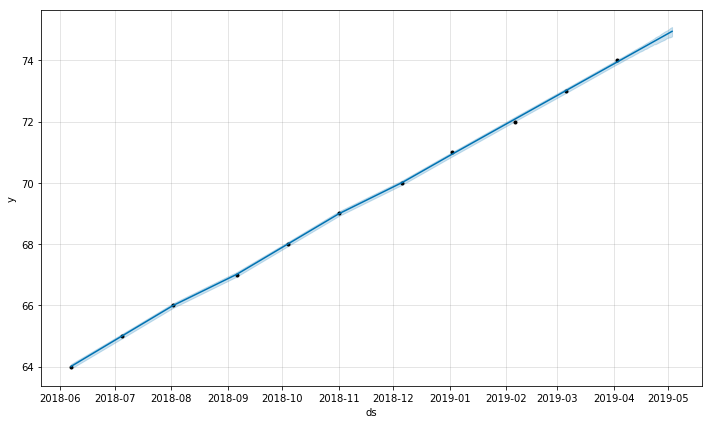

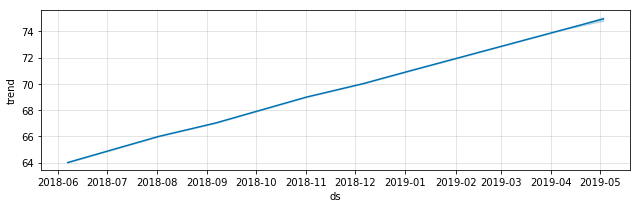

In [134]:
_ = model.plot(forecast,uncertainty=True)
_ = model.plot_components(forecast,uncertainty=True)
model.plot_components?

